# **The Sparks Foundation - GRIP**

## **Data Science & Business Analytics Intern - May'21**

### **Task 2: Prediction using Unsupervised Machine Learning**

**AIM - From the given ‘Iris’ dataset, predict the optimum number of cluster and represent it visually.**

## Author: Rahul Roy

#### IMPORTING LIBRARIES 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

#### READING DATA 

In [2]:
data = pd.read_csv('D:/R and Python/Iris.csv')
print("Data imported successfully")

Data imported successfully


#### DATA OVERVIEW 

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 6)

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### DATA PREPROCESSING

In [8]:
x=data.drop(['Id','Species'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### K-MEANS CLUSTERING

##### This algorithm identifies k number of centroids and allocates every data point to the nearest cluster, while keeping the centroids small.


##### Finding optimum number of clusters-

In [9]:
x=data.iloc[:,[0,1,2,4]].values

##### The elbow method runs k-means clustering on the dataset and computes an average score for each cluster

In [10]:
w=[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    w_iter=kmeans.inertia_
    w.append(w_iter)

In [13]:
w

[281454.4606666665,
 70423.92346666665,
 31328.298685474183,
 17685.755093555093,
 11357.275921764925,
 7906.552955852841,
 5827.779742141917,
 4513.119070175439,
 3564.8221805555545]

#### PLOTTING GRAPH

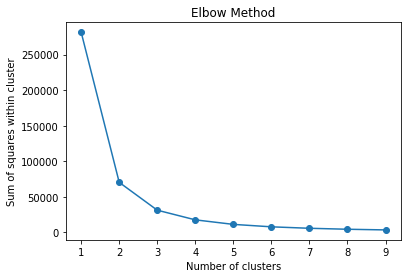

In [11]:
num_cluster=range(1,10)
plt.plot(num_cluster,w,'o-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares within cluster')
plt.show()

In [12]:
kmeans=KMeans(n_clusters = 3, init='k-means++',max_iter=300, n_init = 10,random_state = 0)
y_kmeans=kmeans.fit_predict(x)

#### CLUSTERS

In [13]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### VISUALISATION OF CLUSTERS 

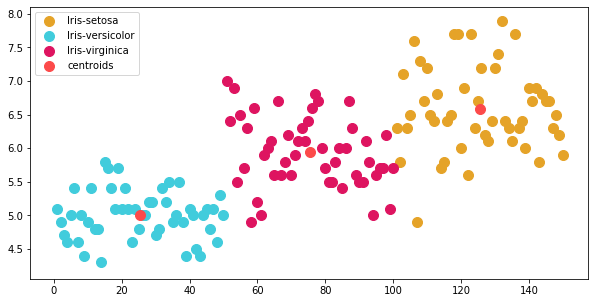

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],
           s = 100, c='#E5A328', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s = 100, c='#41CCDC',label='Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1],
           s= 100, c='#DE1460',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s= 100, c='#FC4A4A',label='centroids')
plt.legend()
plt.show()

### Thank You